# K nearest neighbors classification 

**Topics**
1. Theory
2. Coding
3. Exercise

What is K-nearest neighbors classification?

Lets say you are doing a classification for iris flowers.

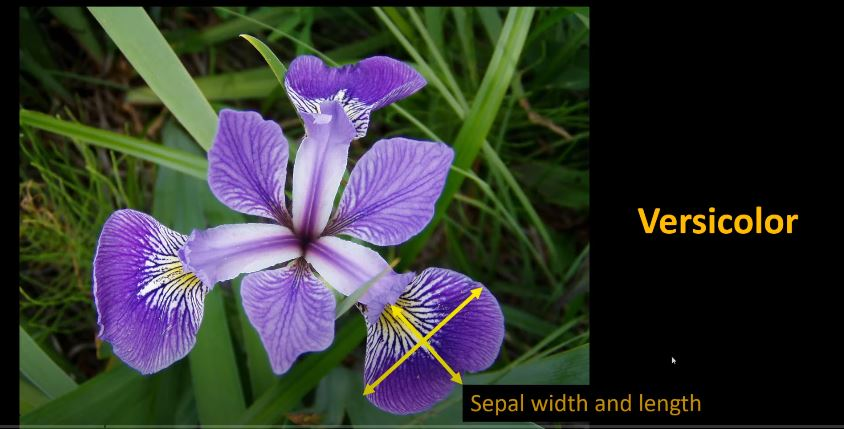

The image is versicolor flower which is one of the 3 types of iris flower and build on a sepal width and length and we can actually figure out which of the 3 flowers category it is in.

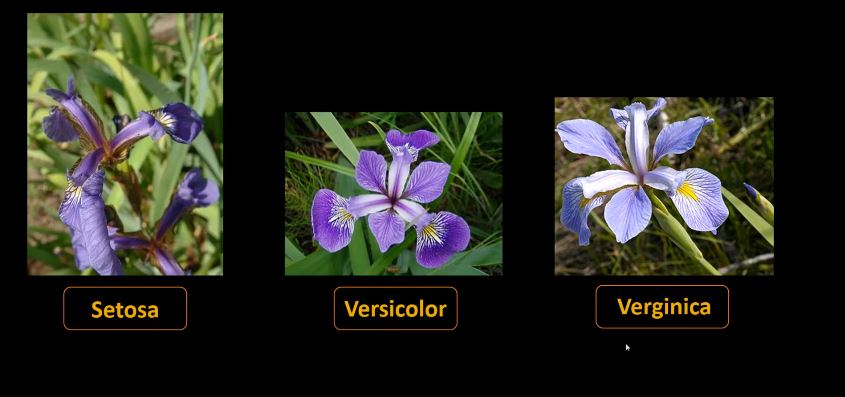

So we are classifying an iris flower into one of the 3 classes:
1. Setosa
2. Versicolor
3. Virginica

Based on sepal width and heigth.

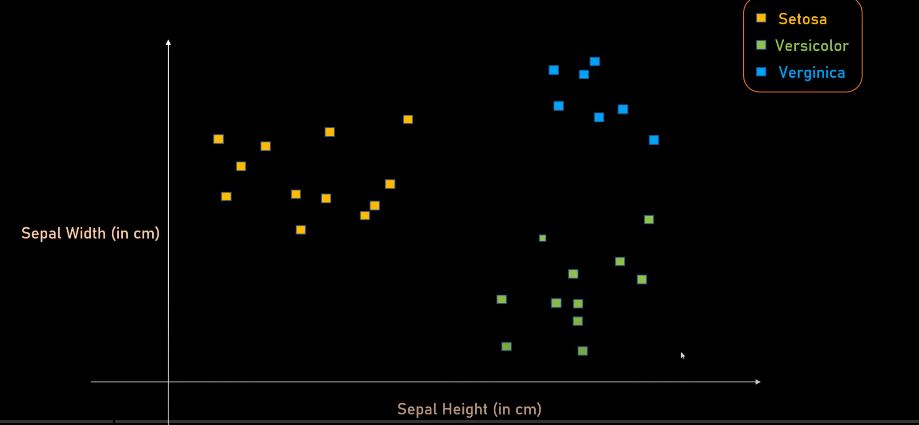

We can plot sepal width and heigth in this kind of 2D scatter plot and we can plot all of our data points.

Lets assume, we have build a model and we have a new data point, so the yellow data point we dont know what class is this and using KNN, we want to figure out.


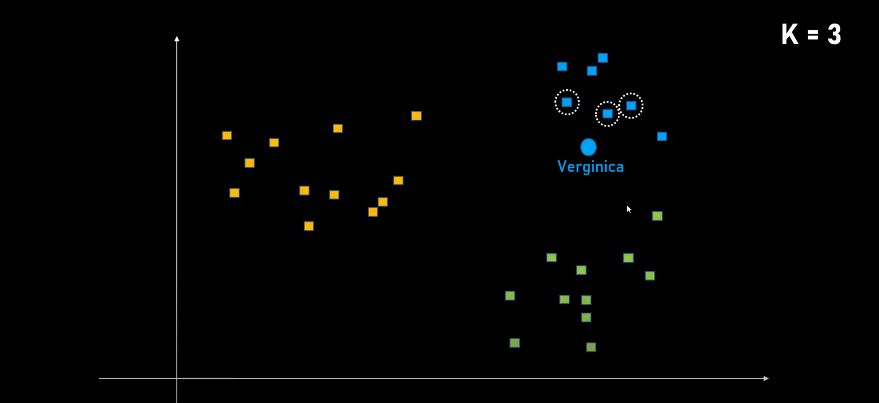

By looking at the graph itself, we immediately get an intuition that this has to be blue color which is virginica because it is more near to this cluster and KNN works just like that. In KNN, we first figure out that what is the value of K and we can figureout the value of K by trial and error, there is no specific rule for it, usually most of the people use 5 but we can use different number. So lets assume we use k 3 i-e K=3 as shown in figure and it means that we have to figure out the most near by 3 data points, so the most near by 3 data points using **Euclidean distance**, which is just a simple distance between these 3 blue points.

Since these 3 are virginica as shown in figure:

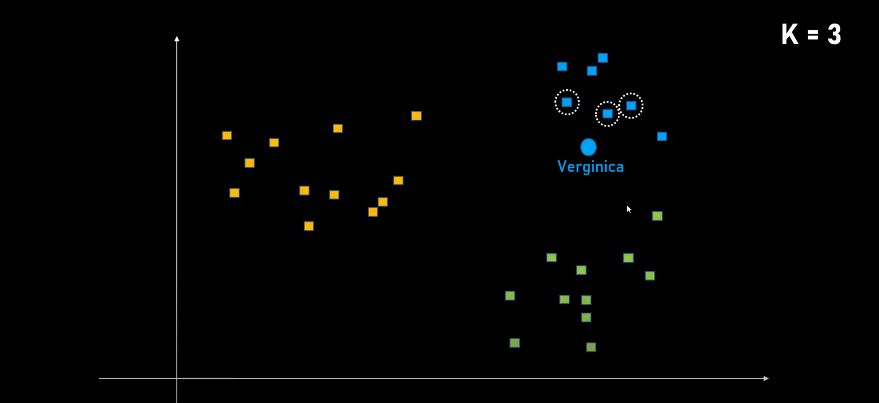

Then our yellow datapoint is also a virginica. K-nearest neighbor algorithm is super simple, we figure out the most near by K datapoint and whichever category that datapoint belong then my new data point belongs to that category.

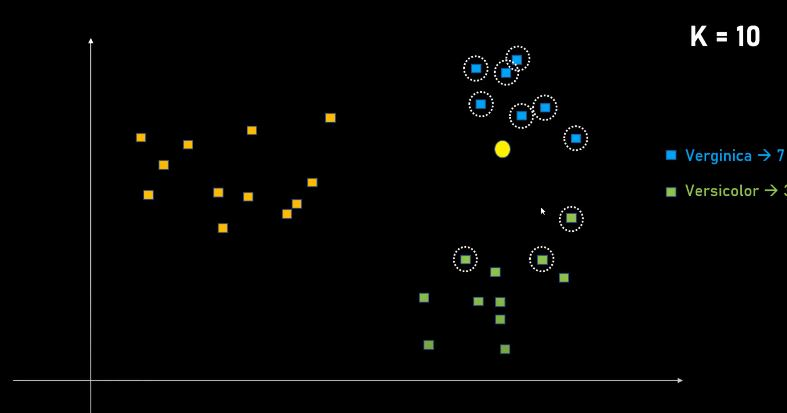

Lets assume our K is 10 i-e K=10 then again we figure out the most near by 10 datapoints, so here we have 7 virginica and 3 versicolor. We take the highest number which is 7 which is virginica as shown.

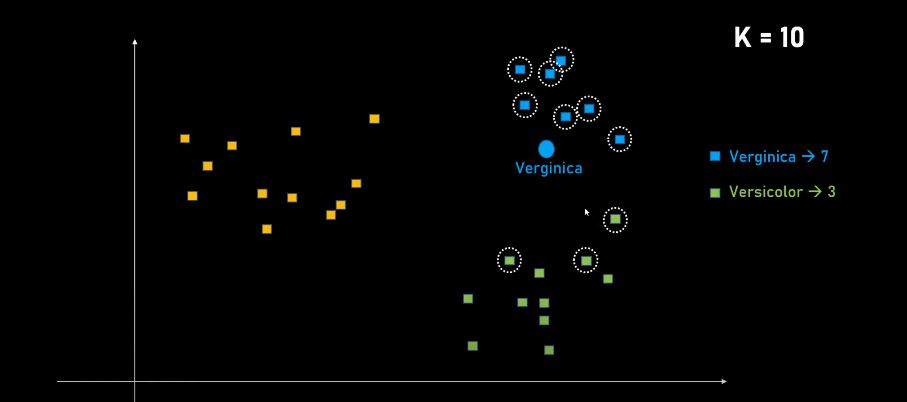

How about if K is 20 i-e K=20, if it is 20 then we have a problem because our total number of datapoints in virginica are very less, so now, it is misclassifying this yellow datapoint saying that this is versicolor as shown:

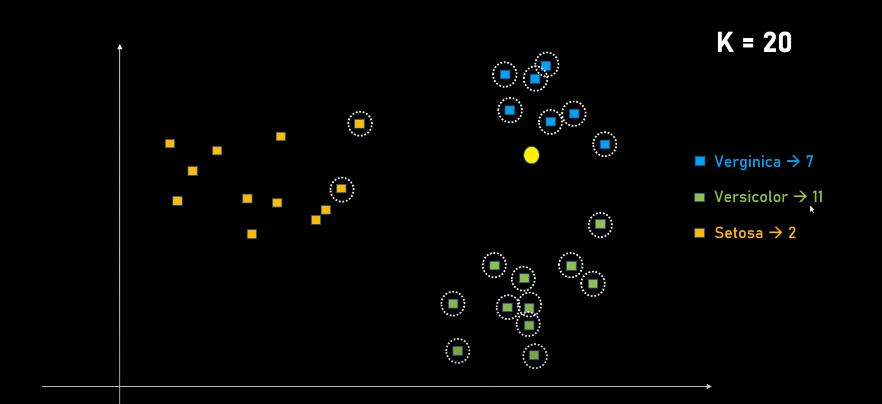

Because the rule is to figure out the most nearby K data point and you take and you take the maximum count so here k is 20, some maximum data points which are near are versicolor which is 11 data points but this will be wrong because clearly by looking at the graph we know that this yellow datapoint is actually virginica.

So we have to carefully choose a value of K such that it is not very high or not very low.

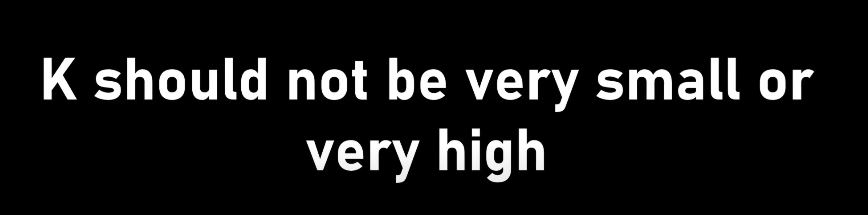

Again style and error depends on situation, and training dataset and so on.

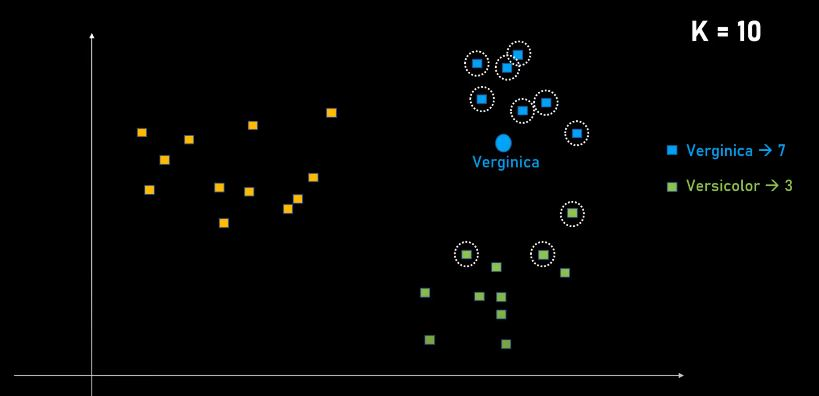

One thing we should notice that here we had only 2 features i-e sample width and sample heigth but KNN works equally if there are more than 2 features i-e there could be N number of features and KNN will just work fine

# Coding

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

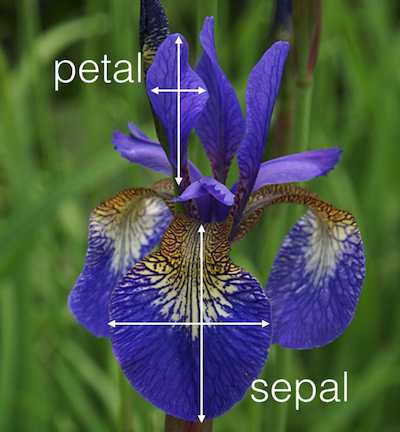

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.shape

(150, 4)

In [7]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [9]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [11]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [18]:
df0 = df[:50] # Setosa
df1 = df[50:100] # versicolor
df2 = df[100:] # virginica

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

**Sepal length vs Sepal width (setosa vs versicolor)**

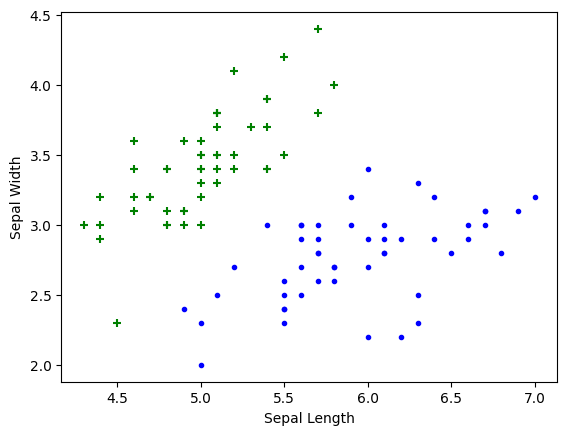

In [17]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='.')

**Petal length vs Petal Width (Setosa vs Versicolor)**

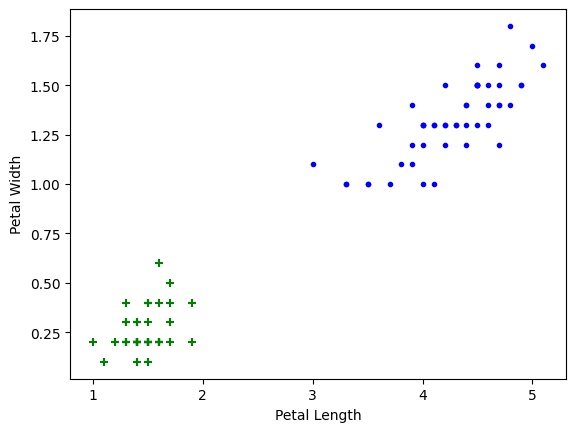

In [19]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker='.')

**Train test split**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop(['target', 'flower_name'], axis='columns')
y = df.target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [23]:
len(X_train)

120

In [24]:
len(X_test)

30

In [26]:
len(y_train)

120

In [27]:
len(y_test)

30

**Create KNN (K nearest Neighbor Classifier)**

In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [66]:
knn.score(X_test,y_test)

0.9666666666666667

In [67]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Text(58.222222222222214, 0.5, 'Truth')

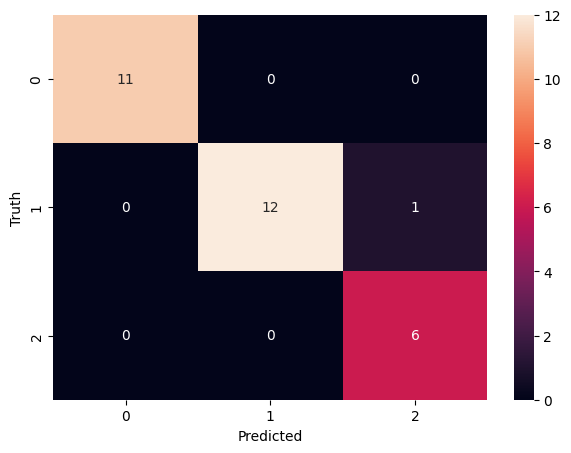

In [68]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

